In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\Dataset\database_IND.csv")
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.7470,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.1952,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.3352,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.4342,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.0460,1338.093000,1563.457000,Central Electricity Authority,NaN


### Data Inspection

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
df.shape

(908, 25)

In [7]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [8]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [11]:
df['name'].value_counts()

MEJIA TPS EXT                      1
KYMORE                             1
KONDAPALLI GT                      1
KOYNA COMPLEX                      1
Wind power project in Rajasthan    1
                                  ..
LOWER JURALA                       1
BANSAGAR (I)                       1
PONG                               1
Ingaleshwar Wind Farm              1
SIMHADRI                           1
Name: name, Length: 908, dtype: int64

In [12]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 365, dtype: int64

In [13]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [15]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

above count show unique numbers for particular columns 

In [16]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [38]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh', 'total_generation'],
      dtype='object')

In [54]:
data = df.drop(['country','wepp_id','url','country_long','gppd_idnr','name','owner'],axis = 1)


In [55]:
data['total_generation'] = data['generation_gwh_2013'] + data['generation_gwh_2014'] + data['generation_gwh_2015'] + data['generation_gwh_2016'] + data['generation_gwh_2017'] 

In [56]:
data['total_generation'] 

0               NaN
1               NaN
2               NaN
3       3643.093120
4      22248.789736
           ...     
903             NaN
904             NaN
905             NaN
906             NaN
907             NaN
Name: total_generation, Length: 908, dtype: float64

In [57]:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,total_generation
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,3643.093120
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,22248.789736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,Central Electricity Authority,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,NaN
904,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


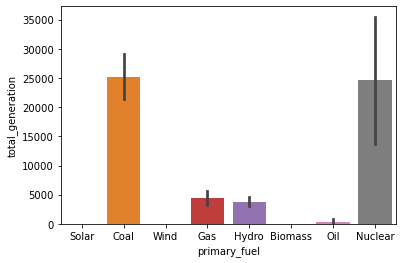

In [47]:
ax = sns.barplot(x="primary_fuel", y="total_generation", data=data)


For Total generation - generation_gwh_2013-2017 (coal,nuclear fuel used more)

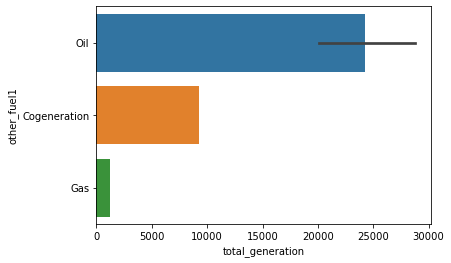

In [51]:
ax = sns.barplot(x="total_generation", y="other_fuel1", data=data)

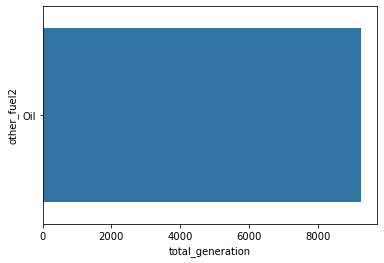

In [52]:
ax = sns.barplot(x="total_generation", y="other_fuel2", data=data)

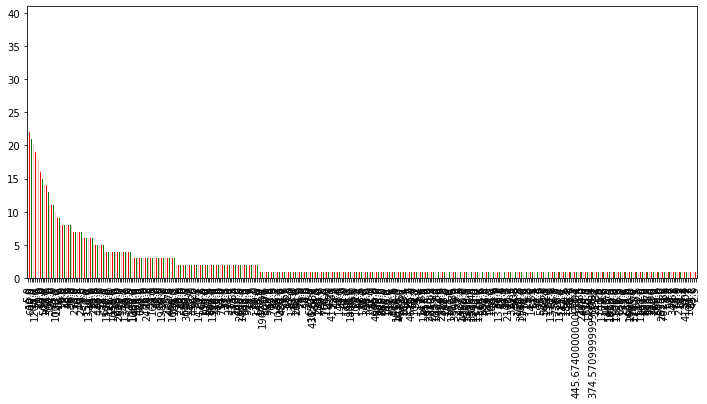

In [62]:

plt.subplots(figsize=(12,5))
data['capacity_mw'].value_counts(normalize = True)
data['capacity_mw'].value_counts(dropna = False).plot.bar(color=['pink', 'red', 'green'])
plt.show()

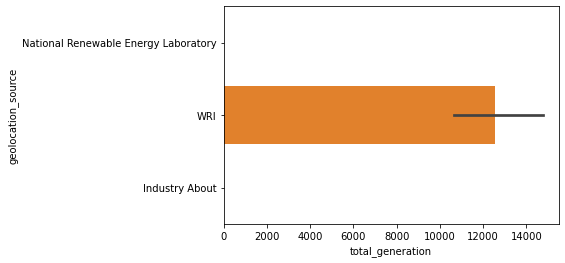

In [58]:
ax = sns.barplot(x="total_generation", y="geolocation_source", data=data)


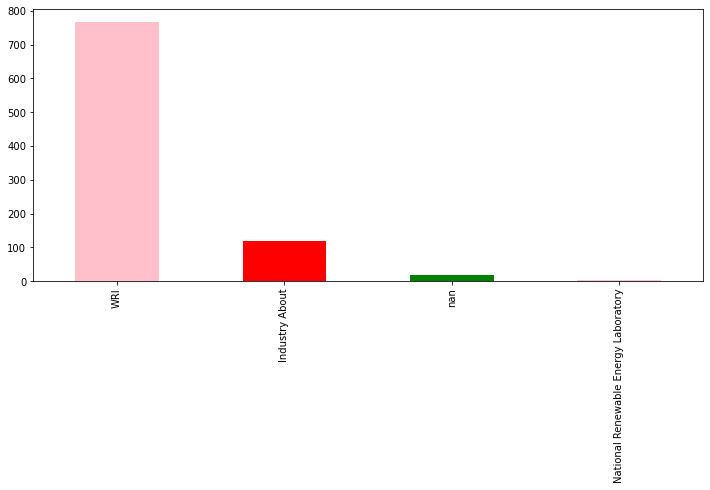

In [59]:

plt.subplots(figsize=(12,5))
data['geolocation_source'].value_counts(normalize = True)
data['geolocation_source'].value_counts(dropna = False).plot.bar(color=['pink', 'red', 'green'])
plt.show()

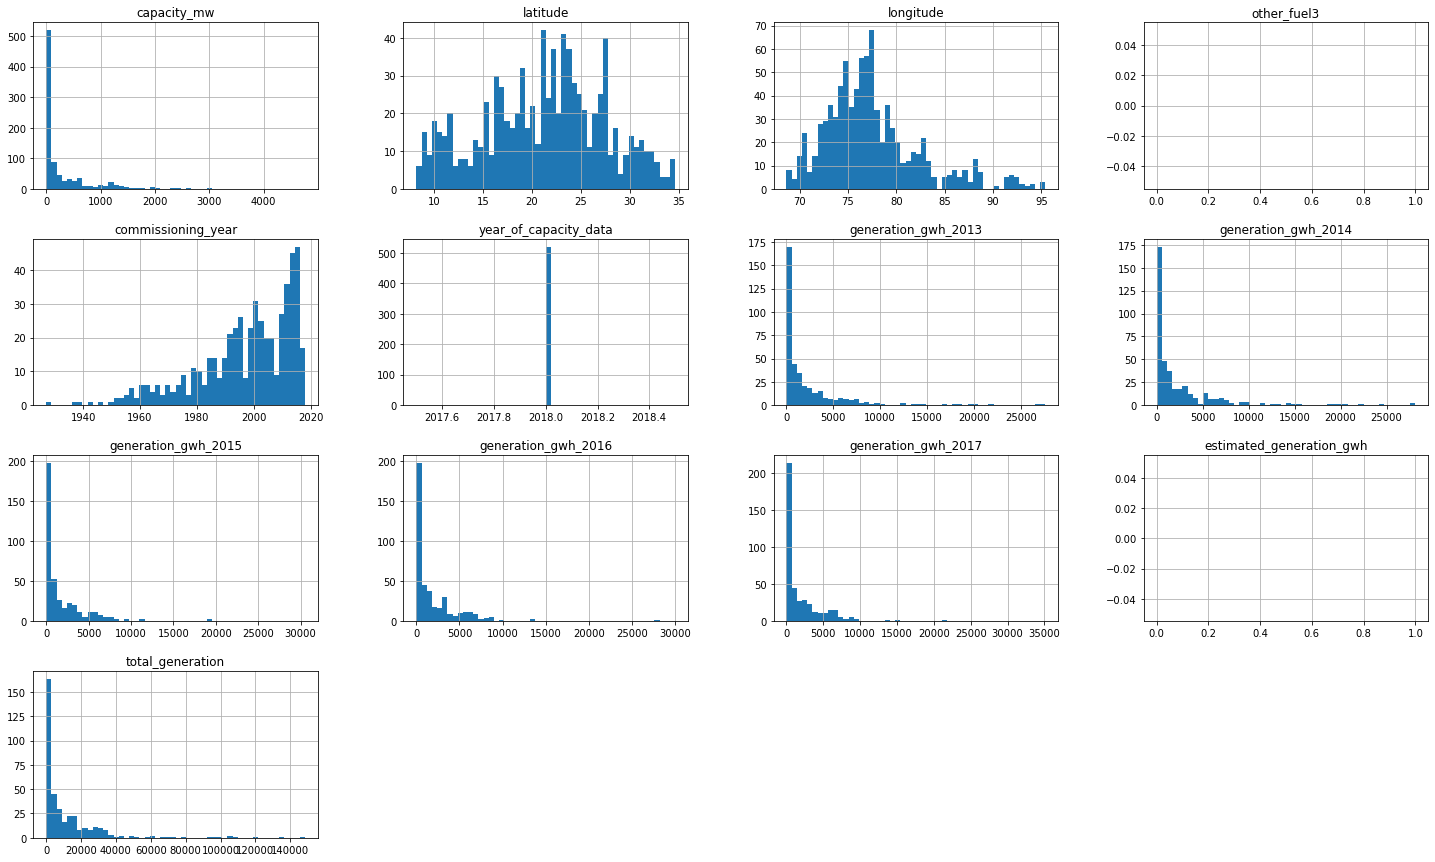

In [60]:
data.hist(bins=50, figsize=(25,15))
plt.show()

<AxesSubplot:>

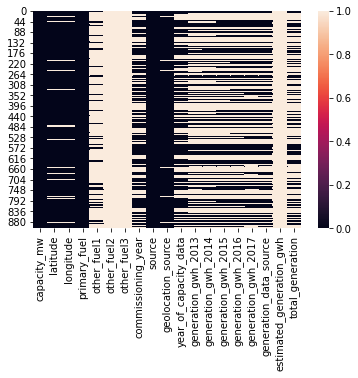

In [63]:
sns.heatmap(data.isnull())

In [64]:
df.corr()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,total_generation
capacity_mw,1.000000,0.050107,0.198377,NaN,0.294661,NaN,NaN,0.823513,0.850698,0.855834,0.881209,0.896785,NaN,0.907417
latitude,0.050107,1.000000,0.031501,NaN,0.120944,NaN,NaN,0.050720,0.059826,0.048103,0.040832,0.039711,NaN,0.053622
longitude,0.198377,0.031501,1.000000,NaN,0.114167,NaN,NaN,0.017461,0.013678,0.023087,0.051128,0.049320,NaN,0.043757
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.294661,0.120944,0.114167,NaN,1.000000,NaN,NaN,0.137351,0.160896,0.171964,0.195301,0.193421,NaN,0.205902
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.823513,0.050720,0.017461,NaN,0.137351,NaN,NaN,1.000000,0.968904,0.908396,0.894752,0.859459,NaN,0.945576
generation_gwh_2014,0.850698,0.059826,0.013678,NaN,0.160896,NaN,NaN,0.968904,1.000000,0.961105,0.937091,0.912585,NaN,0.987933
generation_gwh_2015,0.855834,0.048103,0.023087,NaN,0.171964,NaN,NaN,0.908396,0.961105,1.000000,0.974955,0.940274,NaN,0.988474


In [69]:
dt= df.drop(['country','other_fuel3','other_fuel2','wepp_id','url','latitude','longitude','country_long','gppd_idnr','name','owner','year_of_capacity_data','estimated_generation_gwh'],axis = 1)
dt

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,total_generation
0,2.5,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,3643.093120
4,1800.0,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,3.0,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
dt.nunique()

capacity_mw               365
primary_fuel                8
other_fuel1                 3
commissioning_year         73
source                    191
geolocation_source          3
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
total_generation          370
dtype: int64

In [76]:
data2 = dt.drop(['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','source','generation_gwh_2017'],axis = 1)

In [77]:
data2

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_data_source,total_generation
0,2.5,Solar,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN
1,98.0,Coal,NaN,NaN,WRI,NaN,NaN
2,39.2,Wind,NaN,NaN,WRI,NaN,NaN
3,135.0,Gas,NaN,2004.0,WRI,Central Electricity Authority,3643.093120
4,1800.0,Coal,Oil,2015.0,WRI,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...
903,1600.0,Coal,Oil,2016.0,WRI,Central Electricity Authority,NaN
904,3.0,Solar,NaN,NaN,Industry About,NaN,NaN
905,25.5,Wind,NaN,NaN,WRI,NaN,NaN
906,80.0,Coal,NaN,NaN,WRI,NaN,NaN


In [78]:
data2.nunique()

capacity_mw               365
primary_fuel                8
other_fuel1                 3
commissioning_year         73
geolocation_source          3
generation_data_source      1
total_generation          370
dtype: int64

<AxesSubplot:>

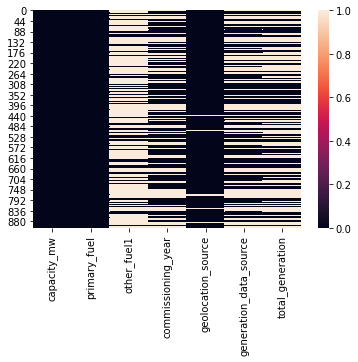

In [79]:
sns.heatmap(data2.isnull())